In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data loading and assembly

In [16]:
spectra = pd.read_csv('../data/dataset.csv')
columns = ['target', 'sampleID']
columns.extend([str(x) for x in range(950, 1530+1,2)])
spectra = spectra[columns]

spectra.head()

,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,94.333333,0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.791820,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571
1,94.333333,0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.685869,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826
2,94.333333,0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.618997,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850
3,94.333333,0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.751016,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516
4,76.333333,1,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.001077,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842


# Dataset clean ?

In [17]:
spectra.describe()

,target,sampleID,950,952,954,956,958,960,962,964,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,...,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,87.830660,47.449198,35.174972,34.169147,33.187555,32.305514,31.550925,30.972189,30.537403,30.191219,...,0.592180,0.657583,0.717708,0.763384,0.821528,0.881781,0.940160,1.000826,1.064528,1.128210
std,10.862842,27.340007,2.348484,2.384539,2.416738,2.441372,2.463001,2.482659,2.488624,2.492186,...,0.732162,0.740236,0.747614,0.754623,0.762236,0.770004,0.778396,0.787307,0.795612,0.804476
min,67.666667,0.000000,26.655676,25.505169,24.395685,23.420492,22.587944,21.945278,21.496870,21.147123,...,-1.764682,-1.726724,-1.690527,-1.660725,-1.626905,-1.592568,-1.559861,-1.527287,-1.488511,-1.451741
25%,79.666667,24.000000,33.992277,32.979221,32.002027,31.131445,30.383613,29.791392,29.379014,29.040488,...,0.157696,0.235855,0.301804,0.336286,0.388347,0.447060,0.510264,0.577586,0.633482,0.697918
50%,87.000000,47.500000,35.519716,34.525341,33.560844,32.674768,31.925820,31.391390,30.953384,30.609236,...,0.608148,0.669333,0.740480,0.782105,0.841150,0.898004,0.958507,1.024121,1.086988,1.143772
75%,94.666667,71.000000,36.750025,35.776736,34.838290,33.973112,33.227393,32.652846,32.225858,31.890627,...,1.032679,1.094054,1.155414,1.211737,1.289103,1.351089,1.420611,1.486343,1.554759,1.614336
max,115.000000,94.000000,42.143303,41.016056,39.927353,38.940678,38.071739,37.357346,36.864861,36.467106,...,2.929408,2.975907,3.031236,3.091215,3.146902,3.201092,3.255369,3.311751,3.375964,3.431573


In [18]:
spectra.isnull().sum().sum()

0

In [19]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Columns: 293 entries, target to 1530
dtypes: float64(292), int64(1)
memory usage: 856.2 KB


# Target description

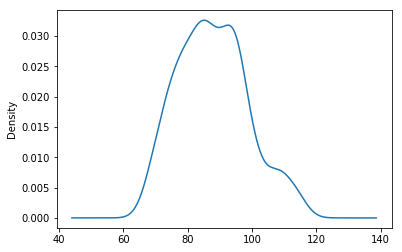

In [20]:
spectra['target'].plot.density()

In [21]:
# The closer to 0, the better
spectra['target'].skew()


0.3520918365929981

In [22]:
from scipy.special import inv_boxcox
from scipy import stats
spectra['targetBC'], lmbda = stats.boxcox(spectra['target'])

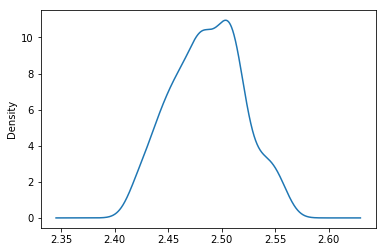

0.00712579420187513

In [23]:
spectra['targetBC'].plot.density()
plt.show()
spectra['targetBC'].skew()

# Clustering and PCA

In [25]:
spectra.head()

,target,sampleID,950,952,954,956,958,960,962,964,...,1514,1516,1518,1520,1522,1524,1526,1528,1530,targetBC
0,94.333333,0,36.723839,35.745964,34.811623,33.955212,33.197552,32.570518,32.147972,31.807793,...,0.831189,0.883438,0.940272,0.993729,1.046867,1.098642,1.152454,1.215338,1.271571,2.508023
1,94.333333,0,36.369366,35.383987,34.443897,33.584080,32.823158,32.192280,31.770844,31.431589,...,0.728103,0.785778,0.845810,0.902551,0.961095,1.017545,1.073209,1.138063,1.196826,2.508023
2,94.333333,0,35.385422,34.405182,33.466976,32.614578,31.862633,31.242191,30.828016,30.496775,...,0.659589,0.712821,0.769303,0.822148,0.875681,0.929040,0.979519,1.040625,1.100850,2.508023
3,94.333333,0,35.121685,34.145687,33.217796,32.374218,31.630789,31.019081,30.611959,30.286642,...,0.796110,0.852175,0.909087,0.965727,1.024710,1.080235,1.133445,1.197904,1.262516,2.508023
4,76.333333,1,36.185947,35.209904,34.280155,33.430157,32.679989,32.062084,31.647160,31.312046,...,1.051815,1.112780,1.175900,1.240040,1.304035,1.365576,1.426388,1.495515,1.561842,2.450626


In [27]:
X = spectra[[str(x) for x in range(950, 1530+1,2)]]
y = spectra['targetBC']

## Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

## PCA

In [29]:
from sklearn.decomposition import PCA

pca=PCA()
Xpca = pca.fit_transform(Xscaled)

In [30]:
pca.explained_variance_ratio_.cumsum()

array([0.88759863, 0.98261512, 0.99593174, 0.99812829, 0.99921017,
       0.9997595 , 0.99991316, 0.99993918, 0.99996419, 0.99998209,
       0.99998743, 0.99999175, 0.99999474, 0.9999964 , 0.99999714,
       0.99999776, 0.99999819, 0.99999854, 0.99999877, 0.99999891,
       0.99999902, 0.9999991 , 0.99999917, 0.99999924, 0.99999929,
       0.99999934, 0.99999938, 0.99999942, 0.99999946, 0.99999949,
       0.99999952, 0.99999955, 0.99999957, 0.99999959, 0.99999961,
       0.99999963, 0.99999965, 0.99999967, 0.99999968, 0.9999997 ,
       0.99999971, 0.99999972, 0.99999974, 0.99999975, 0.99999976,
       0.99999977, 0.99999977, 0.99999978, 0.99999979, 0.9999998 ,
       0.99999981, 0.99999981, 0.99999982, 0.99999983, 0.99999983,
       0.99999984, 0.99999984, 0.99999985, 0.99999986, 0.99999986,
       0.99999986, 0.99999987, 0.99999987, 0.99999988, 0.99999988,
       0.99999989, 0.99999989, 0.99999989, 0.9999999 , 0.9999999 ,
       0.9999999 , 0.99999991, 0.99999991, 0.99999991, 0.99999

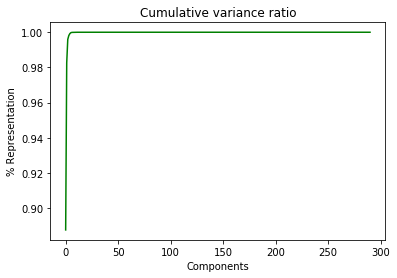

In [31]:
componantsprinccumsum = pca.explained_variance_ratio_.cumsum()
plt.plot(range(len(componantsprinccumsum)), componantsprinccumsum, color = 'green')
plt.title('Cumulative variance ratio')
plt.ylabel('% Representation')
plt.xlabel('Components')
plt.show()

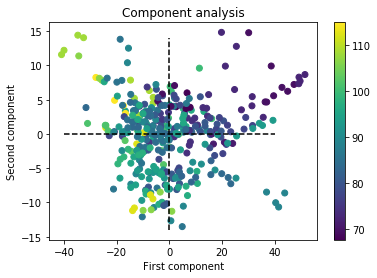

In [34]:
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=spectra['target'])
# Axis
plt.plot([-40, 40], [0, 0], color='black', ls='--')
plt.plot([0, 0], [-14, 14], color='black', ls='--')
# Title
plt.title('Component analysis')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.colorbar()
plt.show()



# Machine learning

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

## Folds definition

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

In [37]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter

In [46]:
class Savgol(BaseEstimator, TransformerMixin):
    """Apply a lambda feature"""
    def __init__(self, params={}):
        self.params = params
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.apply(lambda x:savgol_filter(x, **self.params), axis=1)

## Blocs creation

In [49]:
savgol = Savgol({'window_length':5, 'polyorder':2})


In [50]:
scaler = StandardScaler()

In [51]:
pca = PCA()

In [52]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(random_state=0)

## Linear regression

In [53]:


#lrpipelist = [('scaler', scaler), ('pca', pca), ('elnet', elnet)]
lrpipelist = [('savgol', savgol), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
lrpipe = Pipeline(lrpipelist)

In [54]:
params={
        'pca__n_components':[5, None],
        'elnet__alpha':np.logspace(-10,-2,10),
        'elnet__l1_ratio':np.linspace(1e-5,1,10),
       }

In [55]:
lrgrid = GridSearchCV(lrpipe, params, cv=kf, scoring='neg_mean_squared_error', verbose=0, n_jobs=-2)
lrgrid.fit(X,y)

/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('savgol', Savgol(params={'window_length': 5, 'polyorder': 2})), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=...=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'pca__n_components': [5, None], 'elnet__alpha': array([1.00000e-10, 7.74264e-10, 5.99484e-09, 4.64159e-08, 3.59381e-07,
       2.78256e-06, 2.15443e-05, 1.66810e-04, 1.29155e-03, 1.00000e-02]), 'elnet__l1_ratio': array([1.0000e-05, 1.1112e-01, 2.2223e-01, 3.3334e-01, 4.4445e-01,
       5.5556e-01, 6.6667e-01, 7.7778e-01, 8.8889e-01, 1.0000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
      

In [56]:
lrgrid.best_score_

-0.00015086205113280733

In [57]:
lrgrid.best_params_

{'elnet__alpha': 2.782559402207126e-06,
 'elnet__l1_ratio': 1e-05,
 'pca__n_components': None}

In [58]:
bestparams = {k[7:]:v  for k,v in lrgrid.best_params_.items() if k.startswith('elnet__')}
elnet = ElasticNet(**bestparams, random_state=0)

lrpipelist = [('savgol', savgol), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
lrpipe = Pipeline(lrpipelist)
cross_val_score(lrpipe, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

-0.00014006137025810556

In [61]:
preds = cross_val_predict(lrpipe, X, y, cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, spectra['target'])

15.59913116043148

In [63]:
mean_squared_error(ypred, spectra['target'])**.5

3.949573541590469

## Test on new data

In [41]:
testset = pd.read_csv('NewData.csv', header=127)
testset.drop(['Nanometers', 'Unnamed: 2'], axis=1, inplace=True)
#testset.rename(columns={'Unnamed: 1' : 'Filename', 'Unnamed: 2':'Subfile Index'}, inplace=True)
#testset.head(10)
#spectra.drop(['Nanometers', 'Unnamed: 294'], axis=1, inplace=True)
#spectra.rename(columns={'Unnamed: 1' : 'Filename', 'Unnamed: 2':'Subfile Index'}, inplace=True)
testset.head(10)

,Unnamed: 1,950,952,954,956,958,960,962,964,966,...,1512,1514,1516,1518,1520,1522,1524,1526,1528,1530
0,20180629_065539_1151_0_61,37.940895,36.962978,35.990196,35.117172,34.386551,33.859371,33.424519,33.079514,32.862106,...,1.105209,1.192093,1.260405,1.300014,1.364497,1.434931,1.504250,1.577271,1.647106,1.714334
1,20180629_065653_1151_0_62,36.959248,35.962429,34.969803,34.078838,33.332073,32.790833,32.347843,31.996643,31.774275,...,0.826671,0.917298,0.991051,1.034409,1.102779,1.176222,1.247581,1.322678,1.396483,1.468275
2,20180629_065807_1151_0_63,36.430119,35.442524,34.463196,33.584980,32.847431,32.309505,31.865309,31.510284,31.280643,...,0.867504,0.965108,1.042037,1.089398,1.160517,1.237220,1.310518,1.387354,1.462649,1.544537
3,20180629_065926_1151_0_64,36.535084,35.559456,34.586723,33.717621,32.990570,32.465195,32.033497,31.690992,31.474405,...,0.315956,0.410657,0.484760,0.530601,0.599764,0.673759,0.744144,0.819291,0.892466,0.972292
4,20180629_071704_1151_0_65,36.978073,36.053505,35.134171,34.314812,33.629318,33.133205,32.725826,32.402027,32.195721,...,1.383403,1.474111,1.553763,1.605679,1.679225,1.758519,1.836411,1.917062,1.994701,2.079051
5,20180629_071759_1151_0_66,37.112080,36.124336,35.140778,34.263313,33.526340,32.987194,32.543266,32.189835,31.963789,...,0.881216,0.962744,1.030668,1.072342,1.135710,1.202603,1.269441,1.339502,1.407967,1.482568
6,20180629_071850_1151_0_67,36.796608,35.830574,34.870983,34.011414,33.289494,32.762596,32.330921,31.988190,31.770229,...,1.302107,1.394460,1.471335,1.521640,1.594577,1.671025,1.747438,1.827538,1.903957,1.988091
7,20180629_071922_1151_0_68,36.643765,35.654793,34.672718,33.790176,33.048386,32.506683,32.067062,31.716431,31.487658,...,0.978107,1.061070,1.129755,1.171959,1.235583,1.303460,1.369588,1.438979,1.506408,1.580287
8,20180629_072044_1151_0_69,36.479221,35.563881,34.653393,33.832039,33.142319,32.641079,32.227112,31.896763,31.684326,...,0.377246,0.471061,0.550101,0.603212,0.678430,0.756278,0.834760,0.916124,0.994372,1.069565
9,20180629_072140_1151_0_70,36.391006,35.453556,34.517822,33.678104,32.972988,32.459129,32.037731,31.702637,31.488548,...,0.276499,0.369123,0.447528,0.499328,0.572660,0.651738,0.728322,0.807544,0.885885,0.968575


In [47]:
Xtest = testset.iloc[:,1:]


In [50]:
preds = lrgrid.predict(Xtest)
ytest = inv_boxcox(preds, lmbda)

In [51]:
ytest.shape

(60,)

In [55]:
truetest = pd.read_csv('Answers.csv', header=None)
truetest.head()

,0
0,90.666667
1,90.666667
2,90.666667
3,90.666667
4,93.000000


In [56]:
mean_squared_error(truetest, ytest)**.5

4.321731301526989

In [63]:
df = pd.concat([truetest, pd.DataFrame(ytest)], axis=1)
df.columns = ['True', 'Pred']
df.head()

,True,Pred
0,90.666667,85.928201
1,90.666667,85.846878
2,90.666667,86.670675
3,90.666667,80.986965
4,93.000000,92.004741


In [62]:
import seaborn as sns

/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


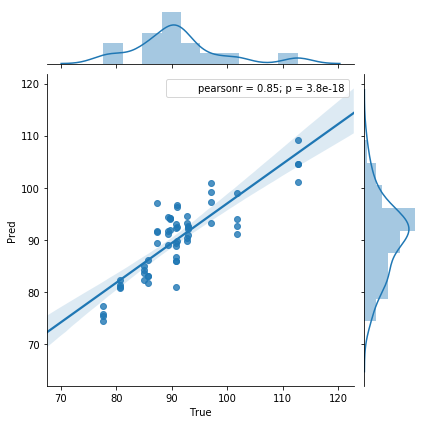

In [67]:
sns.jointplot("True", "Pred", data=df, kind='reg')

### HyperOpt

In [64]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [65]:
counter = 0
def objective(params):
    global counter
    counter += 1
    hyperparams = {
        'alpha': params['alpha'],
        'l1_ratio': params['l1_ratio'],
        'random_state': 0,
        }
    
    #print(hyperparams)
    
    elnet = ElasticNet(**hyperparams)

    pipe = [('savgol', savgol), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
    regpip = Pipeline(pipe)    
    
    score = cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    if counter % 50 == 0:
        print("{} - MSE {}".format(counter, -score))
    return -score

space = {
    'alpha': hp.loguniform('alpha', -10, 2),
    'l1_ratio': hp.loguniform('l1_ratio',-20, 0),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=500)

50 - MSE 0.0006154889209539066
100 - MSE 0.000215432836761324
150 - MSE 0.0001754127556807155
200 - MSE 0.0006024503750819626
250 - MSE 0.000474838218091623
300 - MSE 0.0001681611235249569
350 - MSE 0.0005402709162196787
400 - MSE 0.00020130461768572307
450 - MSE 0.00018067164734632865
500 - MSE 0.00016629721052931196


In [66]:
params = {
        'alpha': best['alpha'],
        'l1_ratio': best['l1_ratio'],
        'random_state': 0,
        }
params

{'alpha': 4.612868333086635e-05,
 'l1_ratio': 0.0019504104763974628,
 'random_state': 0}

In [67]:
elnet = ElasticNet(**params)
pipe = [('savgol', savgol), ('scaler', scaler), ('pca', pca), ('elnet', elnet)]
regpip = Pipeline(pipe)

preds = cross_val_predict(regpip, X, y, cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, spectra['target'])

18.917506065080328

In [69]:
mean_squared_error(ypred, spectra['target'])**.5

4.349425946614143

## Score accuracy

In [72]:
df = pd.DataFrame({'target':spectra['target'], 'pred':ypred, 'sampeID':spectra['sampleID']})
df.head()

,pred,sampeID,target
0,92.882914,0,94.333333
1,94.650645,0,94.333333
2,95.072993,0,94.333333
3,93.827393,0,94.333333
4,81.765618,1,76.333333


In [73]:
df['delta'] = np.abs(df['target'] - df['pred'])
df.head()

,pred,sampeID,target,delta
0,92.882914,0,94.333333,1.450420
1,94.650645,0,94.333333,0.317312
2,95.072993,0,94.333333,0.739660
3,93.827393,0,94.333333,0.505940
4,81.765618,1,76.333333,5.432284


In [104]:
samplesize = df.shape[0]
print('sample size:', samplesize)

for errorabs in [.5, 1, 2, 4,6, 8]:
    correctcount = df[df['delta'] < errorabs].shape[0]
    percent = correctcount/samplesize
    print('prediction +/- {:.1f} : percent {:05.02f} %'.format(errorabs, percent*100))

sample size: 374
prediction +/- 0.5 : percent 08.29 %
prediction +/- 1.0 : percent 18.18 %
prediction +/- 2.0 : percent 35.83 %
prediction +/- 4.0 : percent 65.24 %
prediction +/- 6.0 : percent 83.69 %
prediction +/- 8.0 : percent 94.39 %


# SVR

In [216]:
from sklearn.svm import SVR
svr = SVR()
svrpipelist = [('scaler', scaler), ('pca', pca), ('svr', svr)]
svrpipe = Pipeline(svrpipelist)

In [225]:
params={
        'pca__n_components':[3,5, None],
        #'svr__kernel':['rbf', 'poly'],
        'svr__C':np.logspace(-7,-2,5),
        'svr__epsilon':np.linspace(1e-5,1,5),
       }

In [226]:
svrgrid = GridSearchCV(svrpipe, params, cv=kf, scoring='neg_mean_squared_error', verbose=0, n_jobs=-2)
svrgrid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'pca__n_components': [3, 5, None], 'svr__C': array([1.00000e-07, 1.77828e-06, 3.16228e-05, 5.62341e-04, 1.00000e-02]), 'svr__epsilon': array([1.00000e-05, 2.50007e-01, 5.00005e-01, 7.50003e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [227]:
svrgrid.best_score_

-1.6893546372219984e-06

In [228]:
svrgrid.best_params_

{'pca__n_components': None, 'svr__C': 0.01, 'svr__epsilon': 1e-05}

In [229]:
cross_val_score(svrgrid, X, y, cv=kf, scoring='neg_mean_squared_error' ).mean()

-1.7288464864974685e-06

In [230]:
preds = cross_val_predict(svrgrid, X, y, cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, dataset['Average'])

50.03266057384492

## Light GBM

In [82]:
import lightgbm as lgb

gbm = lgb.LGBMRegressor()
gbmpipelist = [('scaler', scaler), ('pca', pca), ('gbm', gbm)]
gbmpipe = Pipeline(gbmpipelist)

In [27]:
params={
        'pca__n_components':[3,5, None],
        'gbm__num_leaves':[14,12,16, ],
        #'gbm__bagging_fraction':np.linspace(.5,1.,5),
        #'gbm__feature_fraction':np.linspace(.5,1.,5),
        #'gbm__min_child_weight':np.logspace(-6,2.,5),
       }

In [28]:
gbmgrid = GridSearchCV(gbmpipe, params, cv=kf, scoring='neg_mean_squared_error', verbose=0, n_jobs=-2)
gbmgrid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gbm', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       l....0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1))]),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'pca__n_components': [3, 5, None], 'gbm__num_leaves': [14, 12, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [29]:
gbmgrid.best_params_

{'gbm__num_leaves': 14, 'pca__n_components': None}

In [30]:
gbmpipe.set_params(**gbmgrid.best_params_)
preds = cross_val_predict(gbmpipe, X, y, cv=kf)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, dataset['Average'])

33.30880619143876

### HyperOPt

In [31]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin


In [84]:
counter=0
def objective(params):
    global counter
    counter +=1
    hyperparams = {
        'num_leaves': int(params['num_leaves']),
        'min_data_in_leaf': int(params['min_data_in_leaf']),
        'min_child_weight': params['min_child_weight'],
        'n_estimators': int(params['n_estimators']),
        'colsample_bytree': params['colsample_bytree'],
        'bagging_fraction': params['bagging_fraction'],
        'bagging_freq': params['bagging_freq'],
        #'reg_alpha': params['reg_alpha'],
        #'reg_lambda': params['reg_lambda'],
        'max_depth':int(params['max_depth']),
        'learning_rate':params['learning_rate'],
        'seed':0,
        }
    
    gbm = lgb.LGBMRegressor(objective='regression', **hyperparams)

    pipe = [('scaler', scaler), ('pca', pca), ('gbm', gbm)]
    regpip = Pipeline(pipe)    
    
    score = cross_val_score(regpip, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2).mean()
    if counter%10 == 0:
        print("{} - MSE {}".format(counter, -score))
    return -score

space = {
    'num_leaves': hp.uniform('num_leaves', 5, 40),
    'min_data_in_leaf': hp.uniform('min_data_in_leaf',10, 40),
    'min_child_weight': hp.loguniform('min_child_weight', -8, 2),
    'n_estimators': hp.uniform('n_estimators', 100, 5000),
    'colsample_bytree': hp.uniform('colsample_bytree', 0., 1.0),
    'bagging_fraction': hp.uniform('bagging_fraction', 0., 1.0),
    'bagging_freq': hp.randint('bagging_freq', 15),
    #'reg_alpha': hp.loguniform('reg_alpha', -3, 3),
    #'reg_lambda': hp.loguniform('reg_lambda', -3, 3),
    'max_depth': hp.uniform('max_depth', 3, 15),
    'learning_rate': hp.uniform('learning_rate', 0.0001, .1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100)

10 - MSE 1.1485530846561447e-06
20 - MSE 1.099969965945699e-06
30 - MSE 1.1224230978139504
40 - MSE 2.058337290749879e-06
50 - MSE 1.557349740095091e-06
60 - MSE 1.024303948195716e-06
70 - MSE 1.1594225800176912e-06
80 - MSE 1.3055453656882602e-06
90 - MSE 1.0092987402458832e-06
100 - MSE 1.2039181739940501e-06


In [85]:
params = {
        'num_leaves': int(best['num_leaves']),
        'min_data_in_leaf': int(best['min_data_in_leaf']),
        'min_child_weight': best['min_child_weight'],
        'n_estimators': int(best['n_estimators']),
        'colsample_bytree': best['colsample_bytree'],
        'bagging_fraction': best['bagging_fraction'],
        'bagging_freq': best['bagging_freq'],
        #'reg_alpha': best['reg_alpha'],
        #'reg_lambda': best['reg_lambda'],
        'max_depth':int(best['max_depth']),
        'learning_rate':best['learning_rate'],
        'seed':0,
        }
params

{'bagging_fraction': 0.6440701877754111,
 'bagging_freq': 3,
 'colsample_bytree': 0.9924433212131266,
 'learning_rate': 0.012810345517670303,
 'max_depth': 5,
 'min_child_weight': 0.003311022328757844,
 'min_data_in_leaf': 18,
 'n_estimators': 1306,
 'num_leaves': 30,
 'seed': 0}

In [ ]:
hypergbm = lgb.LGBMRegressor(objective='regression', **params)
pipe = [('scaler', scaler), ('pca', pca), ('gbm', hypergbm)]
regpip = Pipeline(pipe)

preds = cross_val_predict(regpip, X, y, cv=kf, n_jobs=-2)
ypred = inv_boxcox(preds, lmbda)
mean_squared_error(ypred, dataset['Average'])